In [1]:
import re # 正则表达式库
import collections # 词频统计库
import numpy as np # numpy数据处理库
import jieba # 结巴分词
import wordcloud # 词云展示库
from PIL import Image # 图像处理库
import matplotlib.pyplot as plt # 图像展示库

In [2]:
red_dream = open('red_dream.txt',encoding='utf-8')
red_dream_str = red_dream.read().replace('\n','')

In [19]:
stops = open('stopwords.txt',encoding='utf-8').readlines()
stops_list = [i.strip() for i in stops]

In [3]:
red_dream_list = jieba.lcut(red_dream_str)

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Thinkpad\AppData\Local\Temp\jieba.cache
Loading model cost 0.623 seconds.
Prefix dict has been built succesfully.


In [24]:
word_frq_num = {}
other_words = ['什么','一个','我们','那里','你们',
                                  '如今','说道','知道','不好','一回','不知',
                                  '听见','两个','姑娘','只见','众人','回来',
                                  '告诉','东西','今日']
for each in red_dream_list:
    if len(each) <= 1 or each in other_words+stops_list:
        continue
    else:
        if each in word_frq_num.keys():
            word_frq_num[each] += 1
        else:
            word_frq_num[each] = 1

In [25]:
word_frq_num_sort = dict(sorted( word_frq_num.items(),key = lambda x:x[1],reverse = True)[:50])

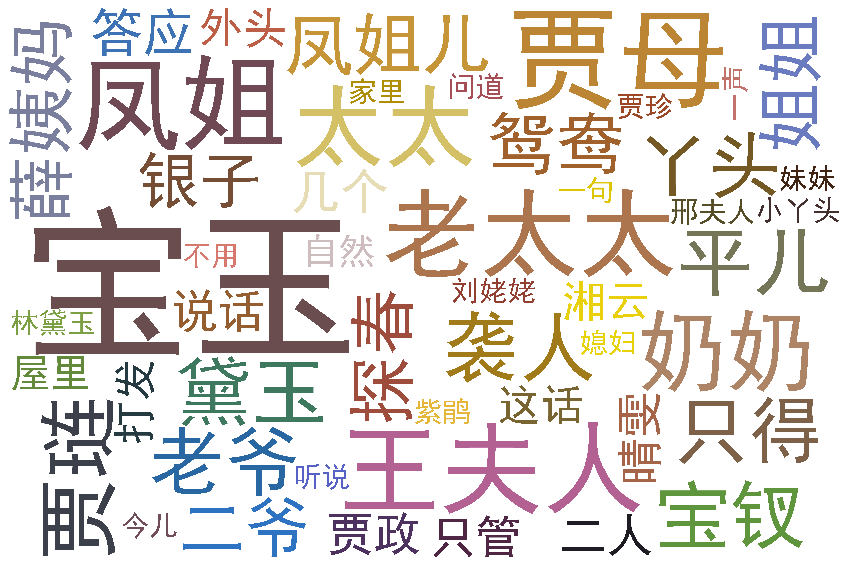

In [27]:
mask = np.array(Image.open('color.jpg')) # 定义词频背景
wc = wordcloud.WordCloud(
    background_color='white', # 设置背景颜色
    font_path='simhei.ttf', # 设置字体格式
    mask=mask, # 设置背景图
    max_words=200, # 最多显示词数
    max_font_size=100 , # 字体最大值
    scale=60  # 调整图片清晰度，值越大越清楚
)
wc.generate_from_frequencies(word_frq_num_sort) # 从字典生成词云
image_colors = wordcloud.ImageColorGenerator(mask) # 从背景图建立颜色方案
wc.recolor(color_func=image_colors) # 将词云颜色设置为背景图方案
wc.to_file("temp.jpg") # 将图片输出为文件
plt.figure(figsize=(15,12))
plt.imshow(wc) # 显示词云
plt.axis('off') # 关闭坐标轴
plt.show() # 显示图像